# SGDRegressor model: Gradient Desent Stochastic

This methode updates iteratively the coefficient using the SGD, sample per sample/mini batch.

Official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

This model is particularly suited for big data base where the analytic method (full batch) becomes too expensive. 

## Important Parameters

### `loss` (str, default=`'squared_error'`)
- Loss function to minimize:
  - `'squared_error'` (ordinary least squares)
  - `'huber'` (squared loss linearized beyond a threshold)
  - `'epsilon_insensitive'`, `'squared_epsilon_insensitive'` (tolerance for small errors)

### `penalty` (`'l2'`, `'l1'`, `'elasticnet'`, `None`, default=`'l2'`)
- Regularization term: Ridge (`'l2'`), Lasso (`'l1'`), or combination of both (`'elasticnet'`), or no penalty (`None`).

### `alpha` (float, default=`0.0001`)
- Regularization strength.

### `l1_ratio` (float, default=`0.15`)
- L1/L2 balance for `'elasticnet'` (0 for pure L2, 1 for pure L1).

### `fit_intercept` (bool, default=`True`)
- Whether to calculate the intercept.

### `max_iter` (int, default=`1000`)
- Maximum number of epochs (complete passes over the data).

### `tol` (float, default=`1e-3`)
- Stopping criterion based on minimum required improvement.

### `learning_rate` (str, default=`'invscaling'`)
- Learning rate schedule strategy: `'constant'`, `'optimal'`, `'invscaling'`, `'adaptive'`.

### `eta0` (float, default=`0.01`)
- Initial learning rate for certain strategies (`'constant'`, `'invscaling'`, `'adaptive'`).

### `early_stopping` (bool, default=`False`)
- Stop training if no improvement is seen for several epochs.

## Important Methods
### `fit(X, y)`
- Trains the model on data `X` and targets `y`.
### `partial_fit(X, y)`
- Updates the model with a batch of data `X` and targets `y`, useful for online learning.


## Further Explanations
### Tolerance (tol) Parameter Explained

The `tol` parameter (default = 0.001 or 1e-3) is a convergence criterion that determines when to stop the training process:

#### How it works:
1. After each epoch, the algorithm calculates the improvement in loss function
2. If the improvement is less than `tol`:
   - The algorithm considers it has "converged"
   - Training stops, even if `max_iter` hasn't been reached

#### Example:
- If loss in previous epoch = 1.2345
- And loss in current epoch = 1.2344
- Then improvement = 0.0001
- If `tol = 0.001`, training would stop as 0.0001 < 0.001

#### Purpose:
- Prevents unnecessary computation when the model is no longer significantly improving
- Helps avoid overfitting by stopping when improvements become marginal
- Saves computational resources

#### Note:
- Lower `tol` values (e.g., 1e-4) = more precise but longer training
- Higher `tol` values (e.g., 1e-2) = faster training but potentially less optimal results


### Loss Functions Explained

#### 1. `'squared_error'` (Ordinary Least Squares)
- Most common loss function
- Calculates the square of the difference between predicted and actual values
- Formula: L = (y_true - y_pred)²
- Pros: Simple, differentiable, works well for most cases
- Cons: Sensitive to outliers

#### 2. `'huber'` Loss
- Combines best of squared error and absolute error
- Below threshold: behaves like squared error
- Above threshold: behaves like absolute error (linear)
- Formula:
  - If |y_true - y_pred| ≤ δ: L = 0.5 * (y_true - y_pred)²
  - If |y_true - y_pred| > δ: L = δ * |y_true - y_pred| - 0.5 * δ²
- Pros: More robust to outliers than squared error
- Cons: Requires tuning of threshold parameter (δ)

#### 3. Epsilon-Insensitive Losses
- `'epsilon_insensitive'`: Ignores errors within epsilon range
- `'squared_epsilon_insensitive'`: Square of epsilon-insensitive loss
- Formula:
  - If |y_true - y_pred| ≤ ε: L = 0
  - If |y_true - y_pred| > ε: L = |y_true - y_pred| - ε
- Pros: Good for problems where small prediction errors are acceptable
- Cons: Requires tuning of epsilon parameter

#### Use Cases:
- `squared_error`: Default choice, good for most regression problems
- `huber`: When data has outliers
- `epsilon_insensitive`: When small errors can be ignored (like in Support Vector Regression)

## Learning Rate Variation

The learning rate value affects the number of iterations needed for convergence. To illustrate this, let's generate a dataset and train the model with different learning rates.

Note: A learning rate that is:
- Too high may cause instability or divergence
- Too low may result in slow convergence
- Optimal will lead to efficient convergence

Let's visualize how different learning rates impact the training process...

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression

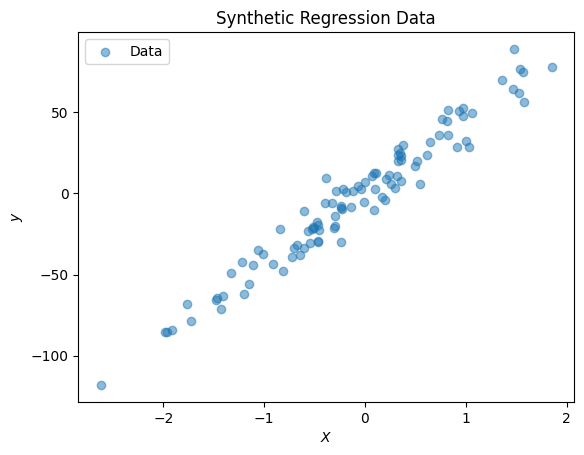

In [5]:
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=1, noise=10.0, random_state=42)

plt.scatter(X, y, alpha=0.5, label="Data")
plt.title("Synthetic Regression Data")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
plt.show()


Now, we'll train the model with different learning rates and visualize:
1. The results
2. The number of iterations needed to:
   - Converge
   - Or reach the stopping criterion

Let's compare how different learning rates affect the model's performance and training efficiency...


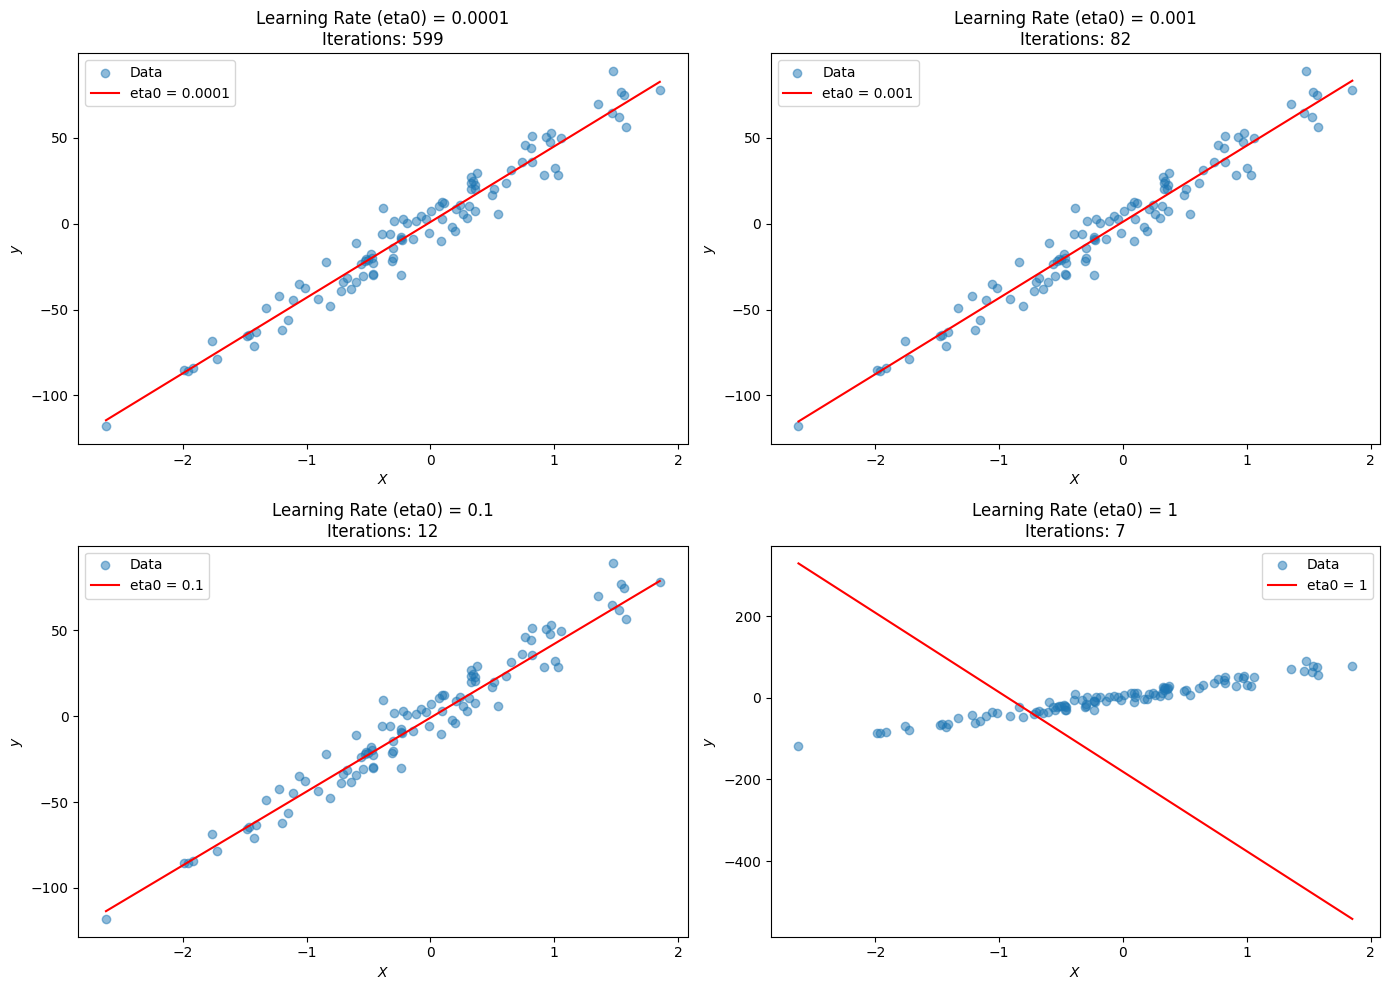

In [6]:
eta_values = [0.0001, 0.001, 0.1, 1]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for eta, ax in zip(eta_values, axes.flatten()):
    model = SGDRegressor(learning_rate='constant', eta0=eta, tol=1e-3, max_iter=1000, random_state=42)
    model.fit(X, y)
    
    ax.scatter(X, y, alpha=0.5, label="Data")
    X_sorted = np.sort(X, axis=0)
    ax.plot(X_sorted, model.predict(X_sorted), color='red', label=f'eta0 = {eta}')
    ax.set_title(f"Learning Rate (eta0) = {eta}\nIterations: {model.n_iter_}")
    ax.set_xlabel("$X$")
    ax.set_ylabel("$y$")
    ax.legend()
    
plt.tight_layout()
plt.show()

# What Do We Observe?

We can clearly see the impact of the learning rate (eta0) on convergence:

1. With a very small rate (0.0001):
   - Convergence is slow
   - Requires more iterations to reach the tolerated improvement threshold
   - More stable but inefficient

2. With a medium rate (0.1):
   - Convergence can be slightly unstable
   - But offers faster convergence in this case
   - Good balance between speed and stability

3. With a high rate (1.0):
   - Model diverges
   - Indicates learning rate is too high for current data and configuration
   - Learning becomes unstable and unreliable

### Key Takeaway
The choice of learning rate is crucial:
- Too low → learning is slow but stable
- Too high → learning becomes unstable or diverges
- Optimal → balanced convergence speed with stability

### Recommended Strategy
Test several values to identify the best learning rate that provides:
- Stable convergence
- Reasonable training speed
- Consistent results

# Using Batches Larger than 1

To perform stochastic gradient descent with mini-batches, we can use the model's `partial_fit` method. This allows us to:
- Update the model using batches of data
- Rather than one sample at a time
- Potentially improving training efficiency

### Advantages of Mini-batch Training:
1. More stable updates than single-sample SGD
2. More efficient computation than full-batch gradient descent
3. Better utilization of modern hardware (CPU/GPU)

In [10]:
model = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.0001,
    learning_rate='invscaling', 
    eta0=0.01, 
    power_t=0.25
)

In [11]:
n_samples = X.shape[0]
batch_size = 20
n_iterations = 10

loss_history = []

for iteration in range(n_iterations):
    indices = np.random.permutation(n_samples)
    
    for start in range(0, n_samples, batch_size):
        batch_idx = indices[start:start+batch_size]
        X_batch = X[batch_idx]
        y_batch = y[batch_idx]
        
        model.partial_fit(X_batch, y_batch)
    
    y_pred = model.predict(X_batch)
    loss = np.mean((y_batch - y_pred) ** 2)
    loss_history.append(loss)
    
    print(f"iteration {iteration+1}/{n_iterations} – MSE full dataset: {loss:.4f}")

iteration 1/10 – MSE full dataset: 842.2838
iteration 2/10 – MSE full dataset: 849.3452
iteration 3/10 – MSE full dataset: 277.8775
iteration 4/10 – MSE full dataset: 171.9667
iteration 5/10 – MSE full dataset: 236.4000
iteration 6/10 – MSE full dataset: 211.8762
iteration 7/10 – MSE full dataset: 163.2674
iteration 8/10 – MSE full dataset: 111.0024
iteration 9/10 – MSE full dataset: 83.6469
iteration 10/10 – MSE full dataset: 97.2689


## MSE Evolution

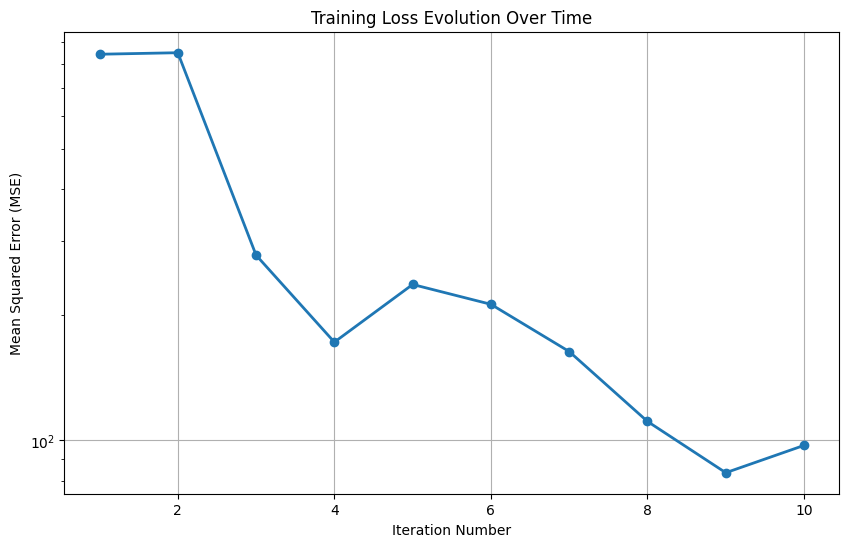

In [14]:
# Visualize training progress
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations+1), loss_history, marker='o', linewidth=2)
plt.grid(True)
plt.xlabel("Iteration Number")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training Loss Evolution Over Time")
plt.yscale('log')  # Optional: log scale for better visualization of loss changes
plt.show()



## Prediction

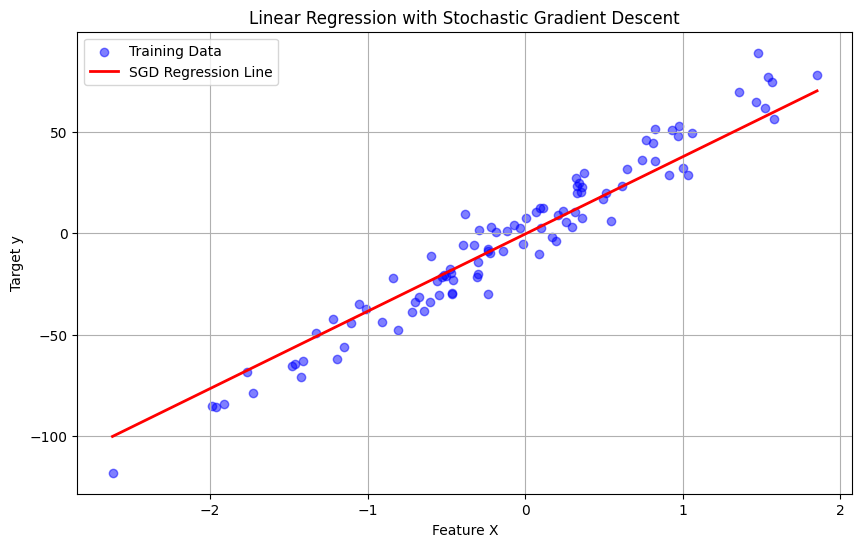

In [13]:
# Visualize the fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Training Data", color='blue')

# Generate points for the regression line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label="SGD Regression Line")

plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Linear Regression with Stochastic Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()
